# Kevin Armbruster (930519-T711)
# Mohammed Akif (990123-4493)

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import problem_1_maze as mz

In [4]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

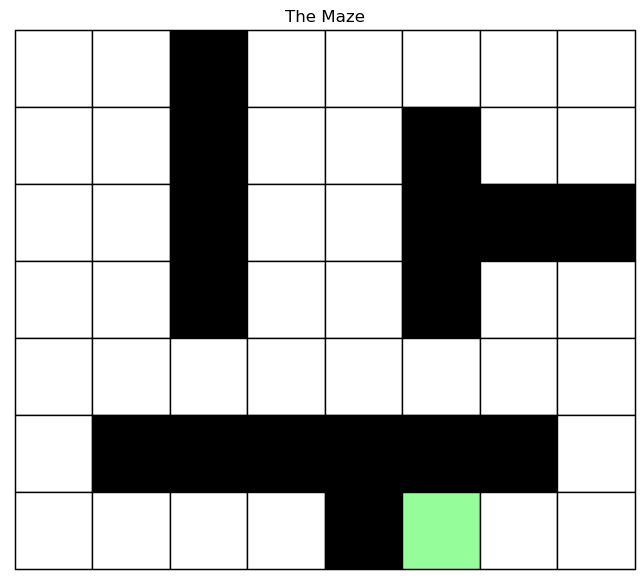

In [5]:
mz.draw_maze(maze)

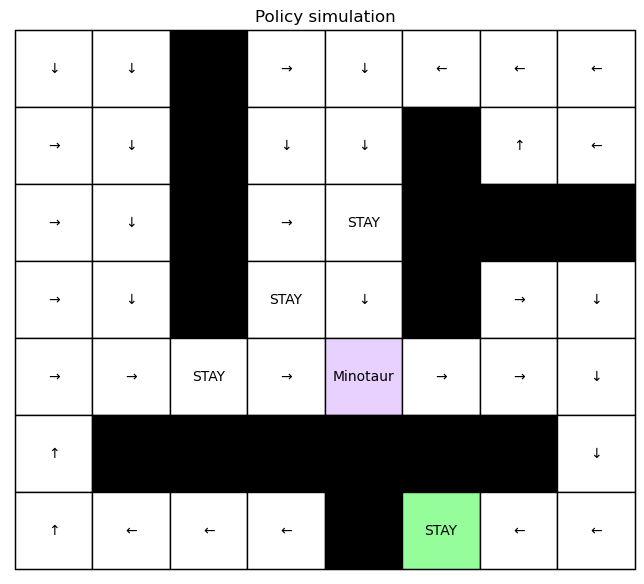

In [6]:
env = mz.Maze(maze, minotaur_can_stay=False)
#env.show()
horizon = 20
V, policy_DP_nostay = mz.dynamic_programming(env, horizon)
mz.visualize_policy(env, policy_DP_nostay, (4, 4))

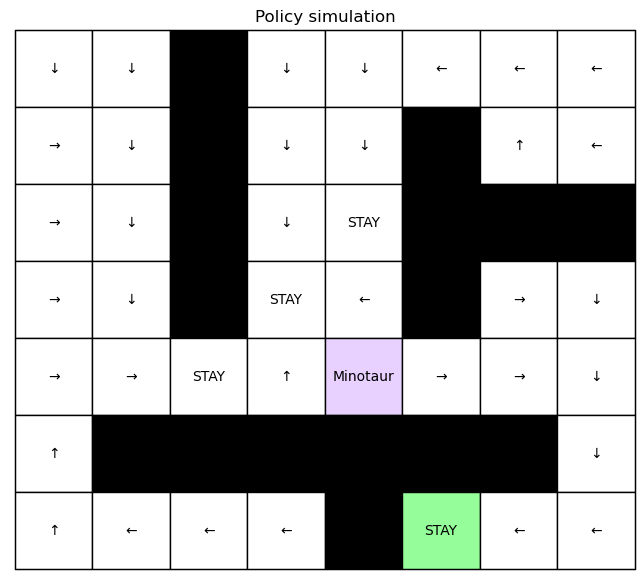

In [7]:
env = mz.Maze(maze, minotaur_can_stay=True)
#env.show()
horizon = 20
V, policy_DP_stay = mz.dynamic_programming(env, horizon)
mz.visualize_policy(env, policy_DP_stay, (4, 4))

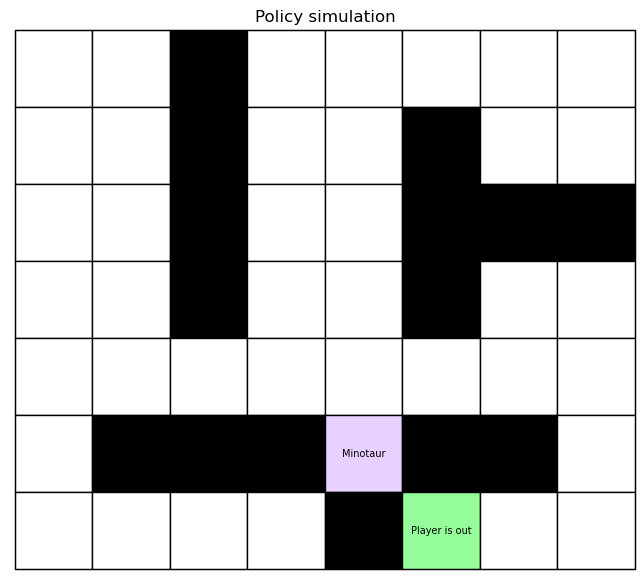

In [8]:
start = (0, 0, 6, 5)
path = env.simulate_DP(start, policy_DP_stay)
mz.animate_solution(maze, path)

1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.2804
16 0.4237
17 0.5094
18 0.6041
19 0.6669
20 0.7124
21 0.761
22 0.8001
23 0.8341
24 0.8577
25 0.8799
26 0.9021
27 0.9094
28 0.9247
29 0.9324
30 0.9476


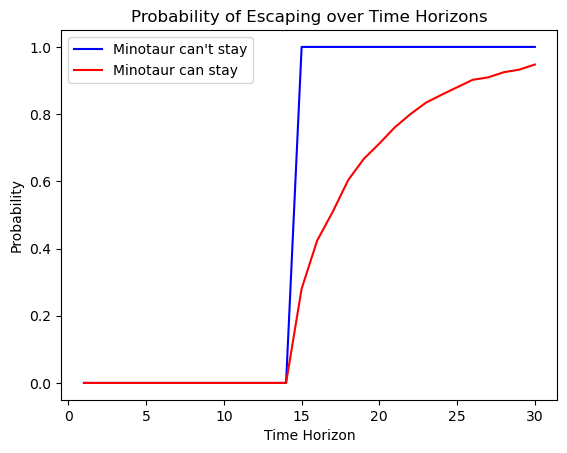

In [11]:
#mz.visualize_probability_over_time_horizons(maze)

In [9]:
env = mz.Maze(maze, minotaur_can_stay=False)
# Discount Factor
gamma = 29 / 30
# Accuracy treshold
epsilon = 0.0001
V, policy_VI_nostay = mz.value_iteration(env, gamma, epsilon)

Needed iterations:  200 , Final error:  1135.922327004373


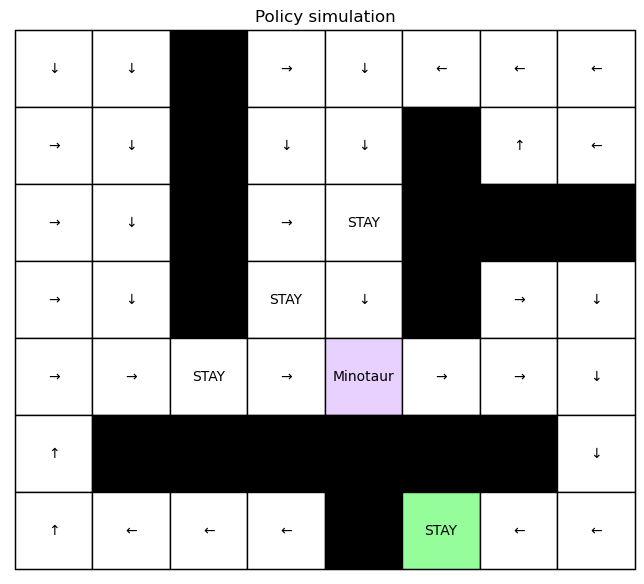

In [10]:
mz.visualize_policy(env, policy_VI_nostay, (4, 4))

In [11]:
env = mz.Maze(maze, minotaur_can_stay=True)
# Discount Factor
gamma = 29 / 30
# Accuracy treshold
epsilon = 0.0001
V, policy_VI_stay = mz.value_iteration(env, gamma, epsilon)

Needed iterations:  200 , Final error:  1135.922327004373


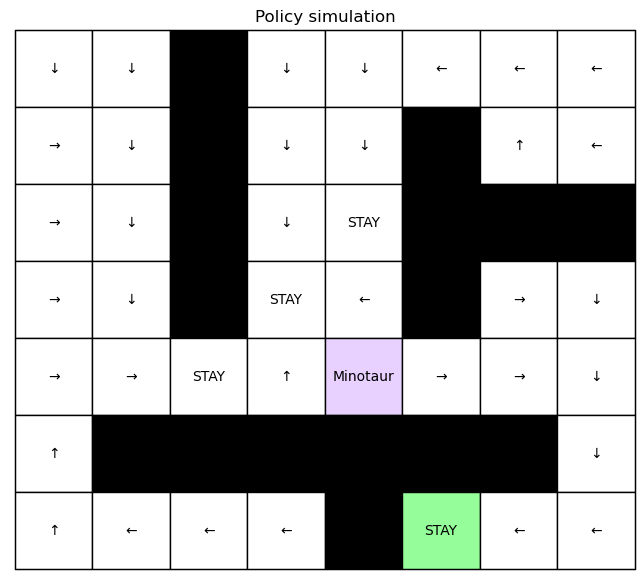

In [12]:
mz.visualize_policy(env, policy_VI_stay, (4, 4))

In [6]:
start = (0, 0, 6, 5)
prob = 0
runs = 10000
for i in range(runs):
    path = env.simulate_VI(start, policy_VI_stay)
    prob += env.maze[path[-1][0:2]] == 2
prob = prob / runs
print("Probability to survive: ", prob)

Probability to survive:  0.7519


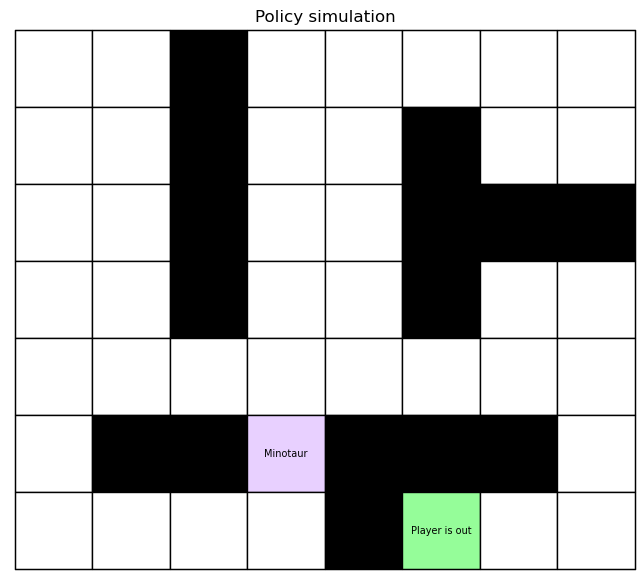

In [13]:
start = (0, 0, 6, 5)
path = env.simulate_VI(start, policy_VI_stay)
mz.animate_solution(maze, path)

In [8]:
prob = mz.simulate_VI_for_probability(env, gamma, epsilon)
print(f"Probability of DP escaping the maze: ", prob)

Needed iterations:  200 , Final error:  1135.922327004373
Probability of DP escaping the maze:  0.7507
